<a href="https://colab.research.google.com/github/yashveersinghsohi/Hospital_Mortality_Prediction/blob/master/Hospital_00_Preliminary_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Reading Dataset

In [2]:
data_path = "https://raw.githubusercontent.com/yashveersinghsohi/Hospital_Mortality_Prediction/master/Data/data.csv"
data = pd.read_csv(data_path)
data_copy = data.copy()

In [3]:
# There is not much insight to gather from this feature
data = data.drop(["ID"], axis=1)

print("Data shape - ", data.shape)
data.head()

Data shape -  (1177, 50)


,group,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,0.0,72,1,37.588179,0,0,0,1,1,0,1,1,0,68.837838,155.866667,68.333333,16.621622,36.714286,98.394737,2155.0,26.272727,2.960000,28.250000,31.520000,89.900,16.220000,7.650000,305.100,74.65,0.40,13.3,10.600000,1.000000,1956.0,148.000000,1.958333,50.000000,114.636364,4.816667,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,0.0,75,2,NaN,0,0,0,0,1,0,0,0,1,101.370370,140.000000,65.000000,20.851852,36.682540,96.923077,1425.0,30.780000,3.138000,31.060000,31.660000,98.200,14.260000,12.740000,246.400,NaN,NaN,NaN,NaN,NaN,2384.0,60.600000,1.122222,20.333333,147.500000,4.450000,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,0.0,83,2,26.572634,0,0,0,0,1,0,0,1,0,72.318182,135.333333,61.375000,23.640000,36.453704,95.291667,2425.0,27.700000,2.620000,34.320000,31.300000,109.800,23.820000,5.480000,204.200,68.10,0.55,24.5,11.275000,0.950000,4081.0,16.000000,1.871429,33.857143,149.000000,5.825000,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,0.0,43,2,83.264629,0,0,0,0,0,0,0,0,0,94.500000,126.400000,73.200000,21.857143,36.287037,93.846154,8760.0,36.637500,4.277500,26.062500,30.412500,85.625,17.037500,8.225000,216.375,81.80,0.15,14.5,27.066667,2.666667,668.0,85.000000,0.585714,15.285714,128.250000,4.386667,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,0.0,75,2,31.824842,1,0,0,0,1,0,0,1,1,67.920000,156.560000,58.120000,21.360000,36.761905,99.280000,4455.0,29.933333,3.286667,30.666667,33.666667,91.000,16.266667,8.833333,251.000,NaN,NaN,NaN,NaN,NaN,30802.0,111.666667,1.950000,43.000000,145.750000,4.783333,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


Data types and number of not-null values of each column

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   group                     1177 non-null   int64  
 1   outcome                   1176 non-null   float64
 2   age                       1177 non-null   int64  
 3   gendera                   1177 non-null   int64  
 4   BMI                       962 non-null    float64
 5   hypertensive              1177 non-null   int64  
 6   atrialfibrillation        1177 non-null   int64  
 7   CHD with no MI            1177 non-null   int64  
 8   diabetes                  1177 non-null   int64  
 9   deficiencyanemias         1177 non-null   int64  
 10  depression                1177 non-null   int64  
 11  Hyperlipemia              1177 non-null   int64  
 12  Renal failure             1177 non-null   int64  
 13  COPD                      1177 non-null   int64  
 14  heart ra

# Train Test split

In [5]:
train_val, test = train_test_split(data, test_size=0.1, random_state=42)
train, val = train_test_split(train_val, test_size=0.1, random_state=42)

# Handling Missing Values

Absolute counts of null values

In [6]:
train.isna().sum()

group                         0
outcome                       1
age                           0
gendera                       0
BMI                         167
hypertensive                  0
atrialfibrillation            0
CHD with no MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal failure                 0
COPD                          0
heart rate                   11
Systolic blood pressure      13
Diastolic blood pressure     13
Respiratory rate             11
temperature                  16
SP O2                        11
Urine output                 26
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 109
Basophils                   204
Lymphocy

%ages of null values and a barplot of the same for visualization

In [7]:
train_nans = ((train.isna().sum()/train.shape[0]) * 100).round(3)
train_nans = train_nans[train_nans>0]
train_nans.sort_values(ascending=False, inplace=True)
train_nans

PH                          24.764
PCO2                        24.449
Basophils                   21.406
Lactic acid                 19.727
BMI                         17.524
Creatine kinase             13.851
Lymphocyte                  11.542
Neutrophils                 11.438
Urine output                 2.728
PT                           1.784
INR                          1.784
temperature                  1.679
glucose                      1.574
Diastolic blood pressure     1.364
Systolic blood pressure      1.364
SP O2                        1.154
Respiratory rate             1.154
heart rate                   1.154
Blood calcium                0.105
outcome                      0.105
dtype: float64

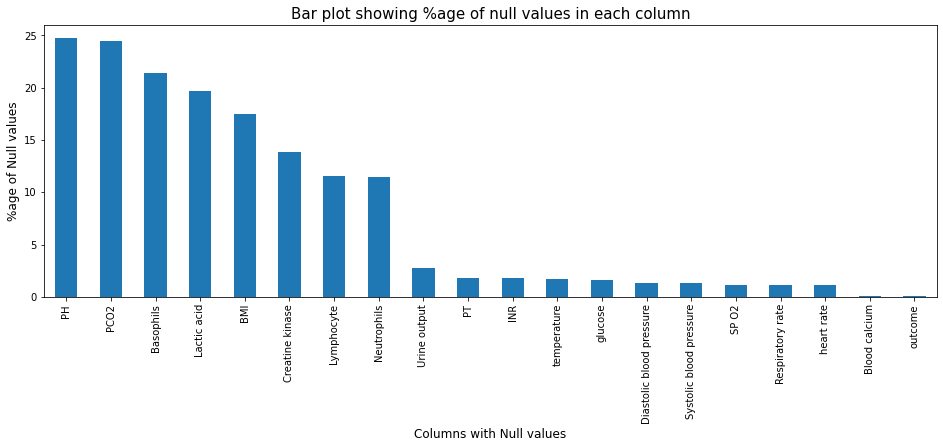

In [8]:
fig, ax = plt.subplots(figsize=(16, 5))
train_nans.plot.bar(ax=ax)
ax.set_xlabel("Columns with Null values", size=12)
ax.set_ylabel("%age of Null values", size=12)
ax.set_title("Bar plot showing %age of null values in each column", size=15)
plt.show()

**Approach used to remove null values**: 
- Since there is only one Null value in the target variable (`outcome`), let's remove that observation. 
- For the rest, let's impute them using mean imputation and add an extra column for each indicating that an imputation was done

In [9]:
# Removing Null observation in outcome
train = train[-train["outcome"].isna()]
val = val[-val["outcome"].isna()]
test = test[-test["outcome"].isna()]

# Adding new columns where there were null values
for col in train.loc[:, train.isna().sum()>0].columns:
  new_col_name = col+"_was_missing"
  train[new_col_name] = train[col].isna().astype(np.int)
  val[new_col_name] = val[col].isna().astype(np.int)
  test[new_col_name] = test[col].isna().astype(np.int)

# Using mean imputation from SimpleImputer
imputer = SimpleImputer(strategy="mean")
train = pd.DataFrame(
    imputer.fit_transform(train), 
    columns=train.columns
  )
val = pd.DataFrame(
    imputer.transform(val), 
    columns=val.columns
  )
test = pd.DataFrame(
    imputer.transform(test), 
    columns=test.columns
  )

# Check if any null values are left in the train set
print("Train Nulls - ", train.isna().to_numpy().flatten().sum())
print("Val Nulls - ", val.isna().to_numpy().flatten().sum())
print("Test Nulls - ", test.isna().to_numpy().flatten().sum())

Train Nulls -  0
Val Nulls -  0
Test Nulls -  0


In [10]:
print("Train Shape - ", train.shape)
print("Val Shape - ", val.shape)
print("Test Shape - ", test.shape)

Train Shape -  (952, 69)
Val Shape -  (106, 69)
Test Shape -  (118, 69)


# Target Distribution

Looking at the target distribution both numerically and through histogram.

In [24]:
value_counts = train["outcome"].astype(np.int).value_counts()
value_counts.index = ["Alive", "Dead"]
pd.DataFrame({
    "Count": value_counts,
    "%age": ((value_counts/value_counts.sum()) * 100).round(3)
})

,Count,%age
Alive,829,87.08
Dead,123,12.92


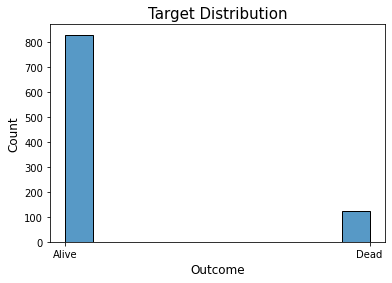

In [25]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.histplot(data=train[["outcome"]].astype(np.int), x="outcome", )
ax.set_xlabel("Outcome", size=12)
ax.set_ylabel("Count", size=12)
ax.set_title("Target Distribution", size=15)
ax.set_xticks(ticks=[0, 1])
ax.set_xticklabels(labels=["Alive", "Dead"])
plt.show()

# Exploring features

## Demographic Characteristics